# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [319]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df3 = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
df3.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [320]:
# Checking the number of mice.
len(df3["Mouse ID"].unique())

249

In [321]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = df3.loc[df3.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [322]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_info = df3.loc[df3["Mouse ID"] == "g989"]
duplicate_mice_info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [323]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df3 = df3[df3['Mouse ID'].isin(duplicate_mice)==False]
cleaned_df3.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [324]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df3["Mouse ID"].unique())

248

## Summary Statistics

In [325]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
#for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_volume = cleaned_df3.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median_tumor_volume = cleaned_df3.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance_tumor_volume =cleaned_df3.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std_tumor_volume =cleaned_df3.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem_tumor_volume =cleaned_df3.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary = pd.DataFrame(
                {"Mean Tumor Volume": mean_tumor_volume,
                 "Median Tumor Volume": median_tumor_volume,
                "Tumor Volume Variance":variance_tumor_volume,
                "Tumor Volume Std. Dev.": std_tumor_volume,
                "Tumor Volume Std. Err.": sem_tumor_volume})
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [326]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
another_summary = cleaned_df3.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(['mean', 'median','var','std','sem'])
another_summary


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

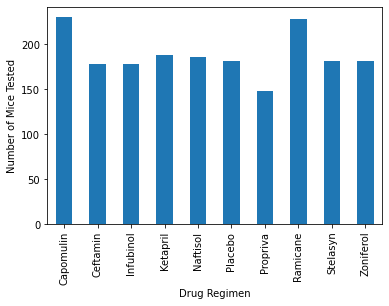

In [327]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_tested = cleaned_df3.groupby("Drug Regimen").count()["Mouse ID"]
mice_tested.plot(kind="bar")
plt.xticks(rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

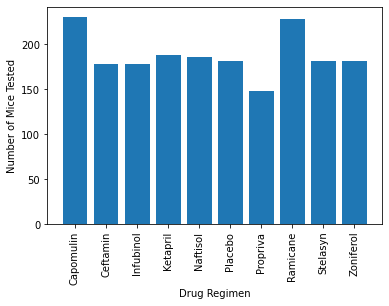

In [328]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mice_tested = cleaned_df3.groupby("Drug Regimen").count()["Mouse ID"]
x_axis = mice_tested.keys()
plt.bar(x_axis, mice_tested)
plt.xticks(rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

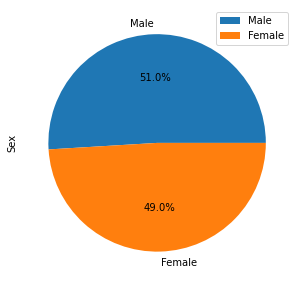

In [329]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Sex = cleaned_df3["Sex"].value_counts()
df_sex = pd.DataFrame(Sex)
plot = df_sex.plot.pie(y="Sex", figsize=(5, 5), autopct='%1.1f%%')
plt.show()

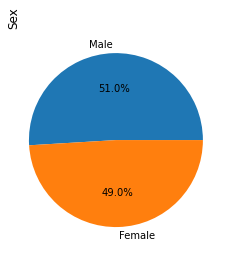

In [330]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Sex = cleaned_df3["Sex"].value_counts()
df_sex = pd.DataFrame(Sex)
males = df_sex.iloc[0,0]
females = df_sex.iloc[1,0]
labels = ["Male", "Female"]
sizes = [males, females]
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Sex", loc = "left", rotation = "vertical")
plt.show()

## Quartiles, Outliers and Boxplots

In [331]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

Capomulin_data = cleaned_df3.loc[cleaned_df3["Drug Regimen"] == "Capomulin",:]
Capomulin_last = pd.DataFrame(Capomulin_data.groupby("Mouse ID").max()["Timepoint"])
Capomulin_merged = pd.merge(Capomulin_last, cleaned_df3, on = ("Mouse ID", "Timepoint"), how="left")
Capomulin = Capomulin_merged["Tumor Volume (mm3)"]

Ramicane_data = cleaned_df3.loc[cleaned_df3["Drug Regimen"] == "Ramicane",:]
Ramicane_last = pd.DataFrame(Ramicane_data.groupby("Mouse ID").max()["Timepoint"])
Ramicane_merged = pd.merge(Ramicane_last, cleaned_df3, on = ("Mouse ID", "Timepoint"), how="left")
Ramicane = Ramicane_merged["Tumor Volume (mm3)"]


Infubinol_data = cleaned_df3.loc[cleaned_df3["Drug Regimen"] == "Infubinol",:]
Infubinol_last = pd.DataFrame(Infubinol_data.groupby("Mouse ID").max()["Timepoint"])
Infubinol_merged = pd.merge(Infubinol_last, cleaned_df3, on = ("Mouse ID", "Timepoint"), how="left")
Infubinol = Infubinol_merged["Tumor Volume (mm3)"]


Ceftamin_data = cleaned_df3.loc[cleaned_df3["Drug Regimen"] == "Ceftamin",:]
Ceftamin_last = pd.DataFrame(Ceftamin_data.groupby("Mouse ID").max()["Timepoint"])
Ceftamin_merged = pd.merge(Ceftamin_last, cleaned_df3, on = ("Mouse ID", "Timepoint"), how="left")
Ceftamin = Ceftamin_merged["Tumor Volume (mm3)"]

In [333]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

treatment = 0

drug_list = ["Capomulin"]


quartiles = Capomulin.quantile([.25,.5,.75])
    
    

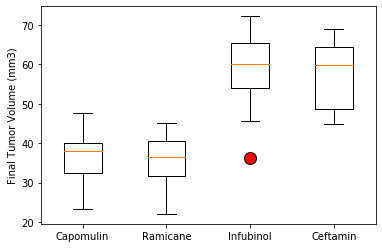

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
ax1.set_ylabel("Final Tumor Volume (mm3)"")
plt.show()

## Line and Scatter Plots

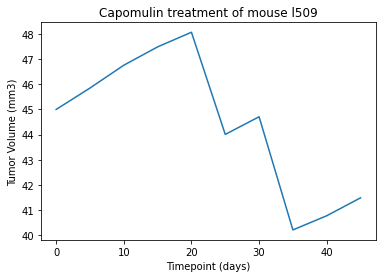

In [259]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
rel_info = cleaned_df3.loc[cleaned_df3["Mouse ID"]== "l509",:]
rel_tumor_volume = rel_info["Tumor Volume (mm3)"]
rel_time = rel_info["Timepoint"]
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
final_line = plt.plot(rel_time, rel_tumor_volume)

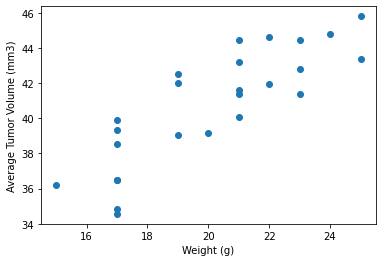

In [269]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_data = cleaned_df3.loc[cleaned_df3["Drug Regimen"] == "Capomulin",:]
Capomulin_mean_data = Capomulin_data.groupby(["Mouse ID"]).mean()
Capomulin_average_tumor_volume = Capomulin_mean_data["Tumor Volume (mm3)"]
rel_weight = Capomulin_mean_data["Weight (g)"]
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
final_line = plt.scatter(rel_weight, Capomulin_average_tumor_volume)

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


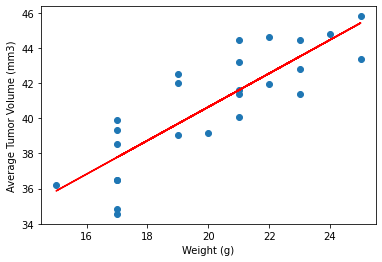

In [290]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

final_line = plt.scatter(rel_weight, Capomulin_average_tumor_volume)
p_slope, p_int, regression, p_p, p_std_err = st.linregress(rel_weight, Capomulin_average_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
pe_fit = p_slope * rel_weight + p_int
plt.plot(rel_weight,pe_fit, color = "red")
print(f"The correlation between mouse weight and the average tumor volume is {str(round(regression,2))}")
plt.show()